Часть первая: Знакомство с Pandas

Прочитайте данные с помощью метода read_html из таблицы "Коефіцієнт народжуваності в регіонах України (1950—2019)" по ссылке

In [210]:
import pandas as pd
import requests
from lxml import etree
import numpy as np

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"
r = requests.get(url)
html = etree.HTML(r.content)
data = html.xpath('/html/body/div[3]/div[3]/div[5]/div[1]/table[11]/tbody')


index = [next(i[0].itertext()) for i in data[0]]
index = index[1:]
colum = [i[1].text for i in data[0]]
#print(index)
data_dict ={}
for j in range(1, len(data[0][0])):
    a =[str(i[j].text).replace(",", ".").replace("\n", "") for i in data[0]]
    data_dict[a[0]] =a[1:]
#print(data_dict)        

In [211]:
#data_dict

In [212]:
dataframe = pd.DataFrame(data_dict, index=index)

dataframe

,1950,1960,1970,1990,2000,2012,2014,2019
Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—
Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Вывести первые строки таблицы с помощью метода head

In [213]:
dataframe.head(5)

,1950,1960,1970,1990,2000,2012,2014,2019
Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


Определите количество строк и столбцов в датафрейме (атрибут shape)

In [214]:
dataframe.shape

(28, 8)

Замените в таблице значения "—" на значения NaN

In [215]:
dataframe.replace("—", np.nan, inplace=True)
dataframe

,1950,1960,1970,1990,2000,2012,2014,2019
Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Определите типы всех столбцов с помощью dataframe.dtypes

In [216]:
dataframe.dtypes

1950    object
1960    object
1970    object
1990    object
2000    object
2012    object
2014    object
2019    object
dtype: object

Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"

In [217]:
dataframe.replace("None", np.nan, inplace=True)
dataframe=dataframe.apply(pd.to_numeric)
dataframe.dtypes

1950    float64
1960    float64
1970    float64
1990    float64
2000    float64
2012    float64
2014    float64
2019    float64
dtype: object

In [218]:
dataframe

,1950,1960,1970,1990,2000,2012,2014,2019
Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)

In [219]:
dataframe["1950"].isnull().sum()/len(dataframe["1950"])

0.07142857142857142

In [220]:
dataframe["1960"].isnull().sum()/len(dataframe["1960"])

0.03571428571428571

In [221]:
dataframe["1970"].isnull().sum()/len(dataframe["1970"])

0.03571428571428571

In [222]:
dataframe["1990"].isnull().sum()/len(dataframe["1990"])

0.0

In [223]:
dataframe["2000"].isnull().sum()/len(dataframe["2000"])

0.0

In [224]:
dataframe["2012"].isnull().sum()/len(dataframe["2012"])

0.0

In [225]:
dataframe["2014"].isnull().sum()/len(dataframe["2014"])

0.07142857142857142

In [226]:
dataframe["2019"].isnull().sum()/len(dataframe["2019"])

0.14285714285714285

Удалите из таблицы данные по всей стране, последняя строчка таблицы

In [227]:
nf=dataframe.drop(["Україна"])
nf

,1950,1960,1970,1990,2000,2012,2014,2019
Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)

In [232]:
nf.fillna({"1950":dataframe["1950"].mean(), "1960":dataframe["1960"].mean(), "1970":dataframe["1970"].mean(), "1990":dataframe["1990"].mean(), "2000":dataframe["2000"].mean(), 
                  "2012":dataframe["2012"].mean(), "2014":dataframe["2014"].mean(), "2019":dataframe["2019"].mean()}, inplace=True)
nf

,1950,1960,1970,1990,2000,2012,2014,2019
Крим,23.000000,20.600000,16.000000,13.0,7.3,12.6,11.142308,8.020833
Вінницька,22.400000,19.200000,14.200000,12.4,8.4,11.2,10.900000,7.600000
Волинська,24.700000,25.000000,17.900000,15.3,11.2,14.8,14.100000,10.100000
Дніпропетровська,20.400000,20.400000,15.100000,12.3,7.1,11.2,11.100000,7.100000
Донецька,27.100000,21.400000,14.000000,10.9,6.1,9.8,8.200000,8.020833
Житомирська,26.100000,22.300000,15.900000,12.9,8.9,12.2,12.000000,7.900000
Закарпатська,31.400000,27.300000,20.700000,16.8,11.5,15.1,14.600000,10.400000
Запорізька,21.900000,19.700000,15.000000,12.4,7.1,10.6,10.600000,6.800000
Івано-Франківська,24.300000,24.800000,18.200000,15.5,10.3,12.4,12.200000,8.800000
Київська,20.400000,18.900000,15.600000,12.3,7.3,12.2,12.100000,8.000000


In [229]:
dataframe.shape

(28, 8)

Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине

In [230]:

total_sum = nf["2019"].sum()
mean= total_sum/(nf.shape[0])
list_of_regions=[]
for i in range(0, nf.shape[0]):
    if dataframe.iloc[i]['2019'] >= mean:   
        list_of_regions.append([index[i], dataframe.iloc[i]['2019']])            
print(f"Mean value {mean}")
list_of_regions

Mean value 8.020833333333334


[['Крим', 8.020833333333334],
 ['Волинська', 10.1],
 ['Донецька', 8.020833333333334],
 ['Закарпатська', 10.4],
 ['Івано-Франківська', 8.8],
 ['Луганська', 8.020833333333334],
 ['Львівська', 8.7],
 ['Одеська', 8.8],
 ['Рівненська', 10.7],
 ['Херсонська', 8.1],
 ['Чернівецька', 9.2],
 ['Київ', 11.0],
 ['Севастополь', 8.020833333333334],
 ['Україна', 8.1]]

В каком регионе была самая высокая рождаемость в 2014 году?

In [233]:
max=[0, 0]
#print(dataframe.shape)
#print(index)
for i in range(0, nf.shape[0]):
    if nf.iloc[i]['2014'] > max[0]:      
        max[1] = nf.iloc[i]['2014']
        max[0] = i

print(index[max[0]] , max[1])      

Рівненська 14.8


Постройте столбцовую диаграмму рождаемости по регионам в 2019 году

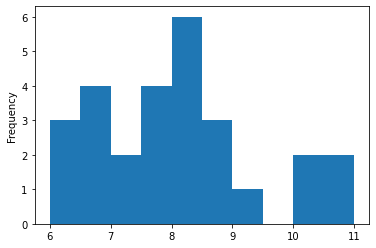

In [237]:
b = pd.Series(nf["2019"], index=index)
b.plot(kind="hist")